## Intro to Unstructured Data

Unstructured data is a fascinating domain, and one that is growing rapidly. Unstructured data is essentially enything that doesn't fit nicely into some sort of schema-on-write store. 

_"Unstructured data is information that either does not have a pre-defined data model or is not organized in a pre-defined manner. Unstructured information is typically text-heavy, but may contain data such as dates, numbers, and facts as well."_
   -- <a href="https://en.wikipedia.org/wiki/Unstructured_data">__Wikipedia__</a>.

Unstructured data can be used to understand human behaviour, recognize patterns in nature, interpret bodies of text, and much more. Some common examples include:

- Pictures
- Text
- Audio Files
- Various text file types
- Emails
- Location Data

__The process for working with unstructured data is generally fairly similar across data types. At a high level you need to:__

- Get data into a nicely machine readable format.


- Extract information that can be indexed. This could mean:
    - OCR'ing documents
    - Transcribing audio
    - Extracting coordinates from addresses
    - Reading XML or other internal structure of a document
    
    
- Choose some set of features to engineer for each data point. Such as:
    - Extracting common words in a sample of text
    - Creating features based on location categories (country, region, metro area, etc)
    - Classiying pictures either by hand, or using machine learning of some variety
    
__For many applications, text analysis is quite important - so we'll start there__

In [1]:
#import nltk, sklearn, pandas, numpy, matplotlib

import nltk
import sklearn
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
#read in the dataset you built from the scrape of the books website and display the top of the df

data = pd.read_csv('scraped_books.csv', index_col=0)
data.head()

,Title,Price,Description,Rating,Link,Genre
0,A Light in the Attic,Â£51.77,It's hard to imagine a world without A Light i...,Three,a-light-in-the-attic_1000/index.html,Poetry
1,Tipping the Velvet,Â£53.74,"""Erotic and absorbing...Written with starling ...",One,tipping-the-velvet_999/index.html,Historical Fiction
2,Soumission,Â£50.10,"Dans une France assez proche de la nÃ´tre, un ...",One,soumission_998/index.html,Fiction
3,Sharp Objects,Â£47.82,"WICKED above her hipbone, GIRL across her hear...",Four,sharp-objects_997/index.html,Mystery
4,Sapiens: A Brief History of Humankind,Â£54.23,From a renowned historian comes a groundbreaki...,Five,sapiens-a-brief-history-of-humankind_996/index...,History


In [3]:
#check if there are any nulls to deal with

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
Title          1000 non-null object
Price          1000 non-null object
Description    1000 non-null object
Rating         1000 non-null object
Link           1000 non-null object
Genre          1000 non-null object
dtypes: object(6)
memory usage: 54.7+ KB


In [4]:
#view counts of the ratings columns

data.Rating.value_counts()

One      226
Three    203
Two      196
Five     196
Four     179
Name: Rating, dtype: int64

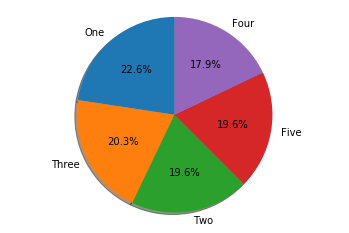

In [5]:
#pie chart the ratings to get a feel for distribution

labels = data.Rating.value_counts().index
sizes = data.Rating.value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [6]:
#there are lots of genres, so just show the number of books in each genre

data.Genre.value_counts()

Default               152
Nonfiction            110
Sequential Art         75
Add a comment          67
Fiction                65
Young Adult            54
Fantasy                48
Romance                35
Mystery                32
Food and Drink         30
Childrens              29
Historical Fiction     26
Poetry                 19
Classics               19
History                18
Womens Fiction         17
Horror                 17
Science Fiction        16
Science                14
Music                  13
Business               12
Thriller               11
Travel                 11
Philosophy             11
Humor                  10
Autobiography           9
Art                     8
Religion                7
Psychology              7
New Adult               6
Spirituality            6
Christian Fiction       6
Biography               5
Self Help               5
Sports and Games        5
Health                  4
Christian               3
Politics                3
Contemporary